## EmotiScan: Real-Time Facial Emotion Detector with Employee Sentiment Analysis

l-time.

## Project Overview
In this project, my aim is to develop a human facial emotion detector using a Convolutional Neural Network (CNN) model. The project begins with the training of the model on an existing dataset, which comprises two folders: one for training and the other for testing. Each folder contains images representing seven distinct human emotions.

Subsequently, I plan to implement a real-time emotion detector. This detector will enable users, particularly those in Human Resources (HR) departments, to predict the emotions of individuals and derive actionable feedback and insights.

To accomplish this, I will utilize various dependencies to train the model effectively and build a real-time face emotion detector. Additionally, I intend to include advisory notes to provide contextual guidance and enhance the utility of the detector in HR scenarios.

Dependencies and Theirct emotions on detected faces in real-time.

##  Summary Workflow:

Data Preparation:

Load and preprocess images using load_img.
Utilize the os module for navigating directories and managing datasets.
Handle data using pandas and numpy.

Model Building:

Create a neural network model using Sequential.
Add layers to build the CNN architecture: Conv2D, MaxPooling2D, Flatten, Dense, and Dropout.
Compile and train the model with the dataset.

Real-Time Prediction:

Capture video frames using OpenCV.
Detect faces, preprocess them, and employ the trained model to predict emotions on detected faces in real-time, providing immediate feedback on facial expression.

# Importing Libraries

## Project Dependencies:

Keras and TensorFlow: Utilized for building and training the Convolutional Neural Network (CNN) model. Specifically, the to_categorical function from Keras is employed to convert class vectors into binary class matrices, ensuring compatibility with multi-class classification tasks.

Layers: Various layers from Keras are utilized within the CNN architecture:

Conv2D: Convolutional layer for image processing, extracting features from input images.

MaxPooling2D: Pooling layer to reduce the dimensionality of feature maps, aiding in feature selection.

Flatten: Layer to convert 2D matrices to 1D vectors, preparing the data for input into fully connected layers.

Dense: Fully connected layer used for making predictions.

Dropout: Regularization layer to prevent overfitting by randomly setting a fraction of input units to 0 during training.

Sequential Model: Employed to create a linear stack of layers, allowing for the sequential stacking of neural network layers.

Operating System (os) Module: Utilized for directory navigation and dataset management, crucial for organizing training and validation data.

Data Handling Libraries:

pandas: Used for data manipulation and analysis, particularly in managing datasets with powerful data structures like DataFrames.

numpy: Essential for efficient array and matrix operations, facilitating the handling of large datasets and performing mathematical computations.

In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.callbacks import EarlyStopping
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

## Directories for Training and Testing Data

In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

## Creating DataFrame from Image Directory

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels

## Loading Training Data

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)
print(train)


angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


# Loading Testing Data


In [5]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)
print(test)
print(test['image'])


angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
706

#### Extracting Features from Images

In [6]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features



In [7]:
train_features = extract_features(train['image']) 
test_features = extract_features(test['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\LENOVO\anaconda3\envs\tensorflow\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


  0%|          | 0/7066 [00:00<?, ?it/s]

## Data Preprocessing

In [8]:
x_train = train_features / 255.0
x_test = test_features / 255.0

### Encoding Labels


In [9]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [10]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [11]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

#### EDA: Visualizing Sample Images: Angry

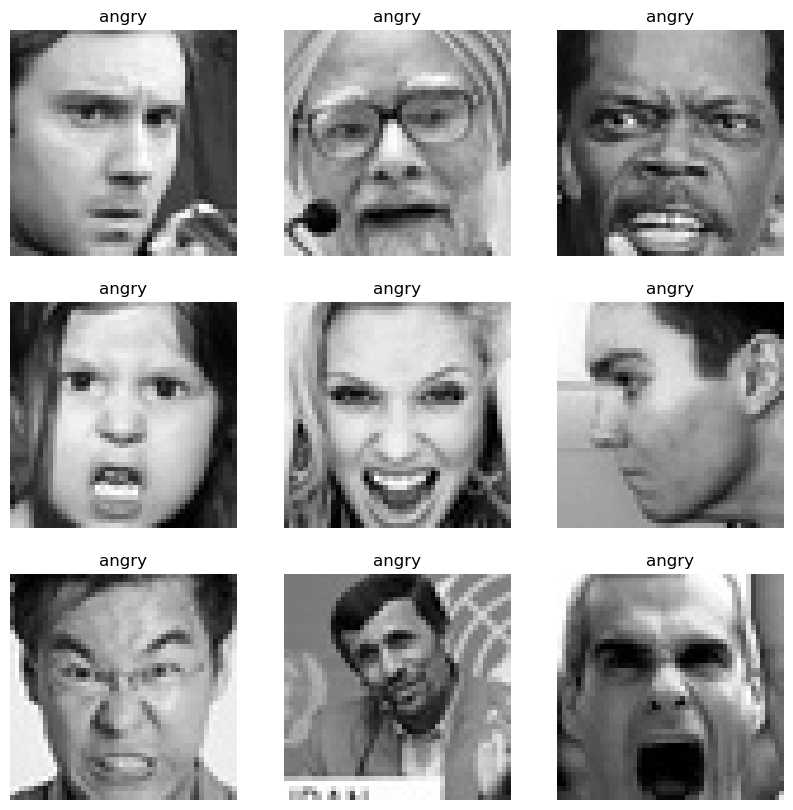

In [12]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_features[i].reshape(48, 48), cmap='gray')
    plt.title(train['label'][i])
    plt.axis("off")
plt.show()

#### EDA: Visualizing Sample Images : Each Category

C:\Users\LENOVO\anaconda3\envs\tensorflow\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


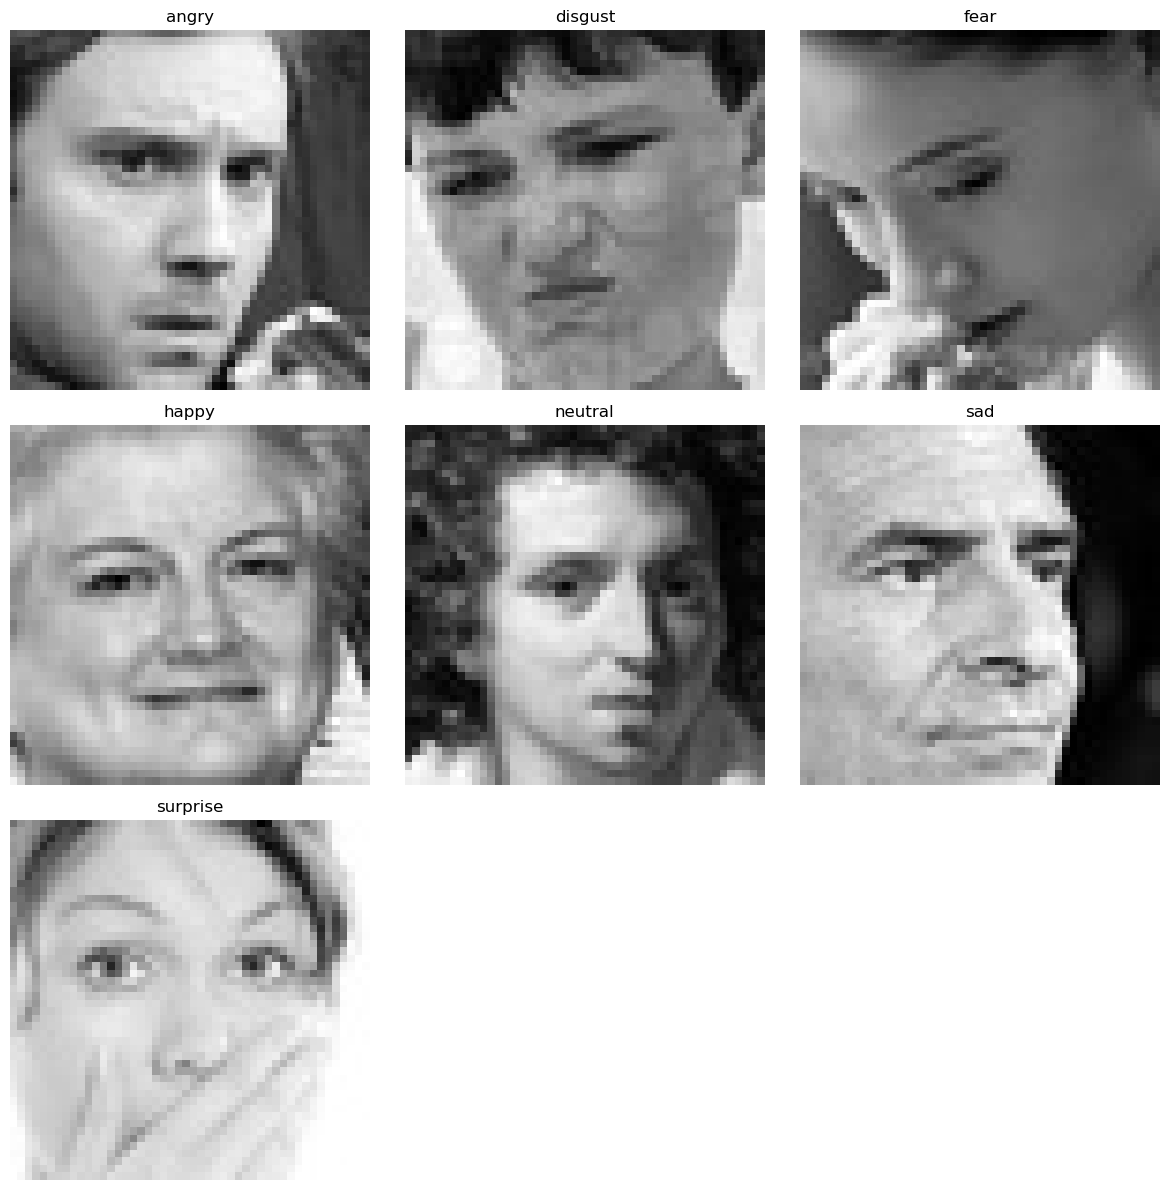

In [13]:
# EDA: Visualizing Sample Images from Each Category
unique_labels = train['label'].unique()
plt.figure(figsize=(12, 12))

for i, label in enumerate(unique_labels):
    # Get the first image for each label
    img_path = train[train['label'] == label]['image'].iloc[0]
    img = load_img(img_path, grayscale=True)
    img = np.array(img)
    
    plt.subplot(3, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(label)
    plt.axis("off")

plt.tight_layout()
plt.show()

# Model Building

In [14]:
# Model Building
model = Sequential()

# Convolutional layers
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 256)       0

In [15]:
# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


#### Model Training with Early Stopping

In [16]:

history = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=50,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/50
226/226 [==============================] - 268s 1s/step - loss: 1.8258 - accuracy: 0.2418 - val_loss: 1.8085 - val_accuracy: 0.2638
Epoch 2/50
226/226 [==============================] - 249s 1s/step - loss: 1.7924 - accuracy: 0.2525 - val_loss: 1.7176 - val_accuracy: 0.2976
Epoch 3/50
226/226 [==============================] - 249s 1s/step - loss: 1.6991 - accuracy: 0.3090 - val_loss: 1.5682 - val_accuracy: 0.3896
Epoch 4/50
226/226 [==============================] - 252s 1s/step - loss: 1.5559 - accuracy: 0.3884 - val_loss: 1.3980 - val_accuracy: 0.4662
Epoch 5/50
226/226 [==============================] - 243s 1s/step - loss: 1.4644 - accuracy: 0.4337 - val_loss: 1.3370 - val_accuracy: 0.4849
Epoch 6/50
226/226 [==============================] - 239s 1s/step - loss: 1.4167 - accuracy: 0.4528 - val_loss: 1.3046 - val_accuracy: 0.5061
Epoch 7/50
226/226 [==============================] - 236s 1s/step - loss: 1.3752 - accuracy: 0.4714 - val_loss: 1.2633 - val_accuracy: 0.5205

####  Model Saving

In [17]:

model_json = model.to_json()
with open("motiondetector.json", 'w') as json_file:
    json_file.write(model_json)
model.save("motiondetector.h5")


#### Model Loading


In [18]:
from keras.models import model_from_json

json_file = open("motiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("motiondetector.h5")

#### Label Mapping

In [19]:
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

#### Image Preprocessing Function

In [20]:

def ef(image):
    img = load_img(image, grayscale=True)
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

#### Testing the Model on a Sample Image

In [21]:

image = 'images/train/sad/42.jpg'
print("Original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is ", pred_label)

Original image is of sad
1/1 [==============================] - 0s 464ms/step
Model prediction is  sad


#### Prediction Sample Images of different labels

original image is of angry
1/1 [==============================] - 0s 54ms/step
model prediction is  angry


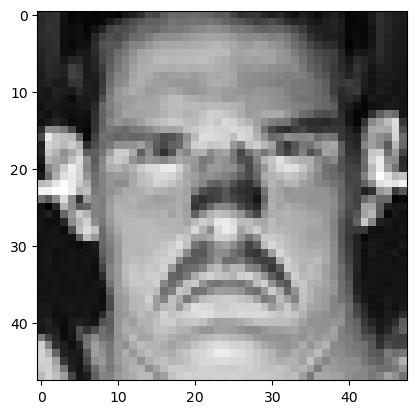

In [33]:
## class angry
image = 'images/train/angry/186.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')


original image is of disgust
1/1 [==============================] - 0s 50ms/step
model prediction is  disgust


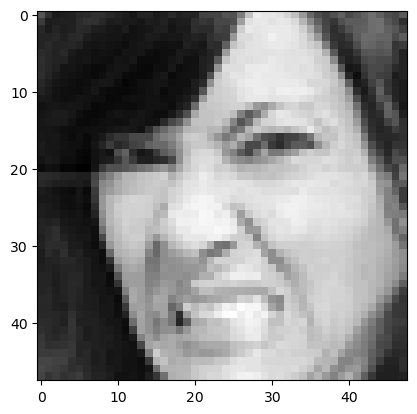

In [31]:
## class disgust
image = 'images/train/disgust/4078.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 40ms/step
model prediction is  happy


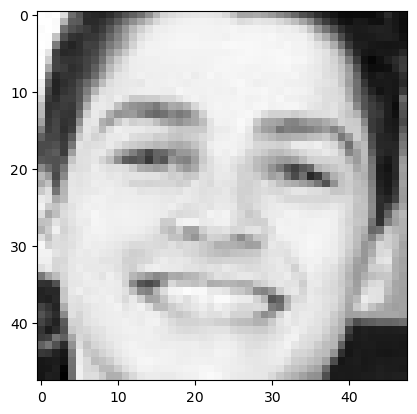

In [32]:
## class happy
image = 'images/train/happy/67.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

#### Plotting Accuracy Graph

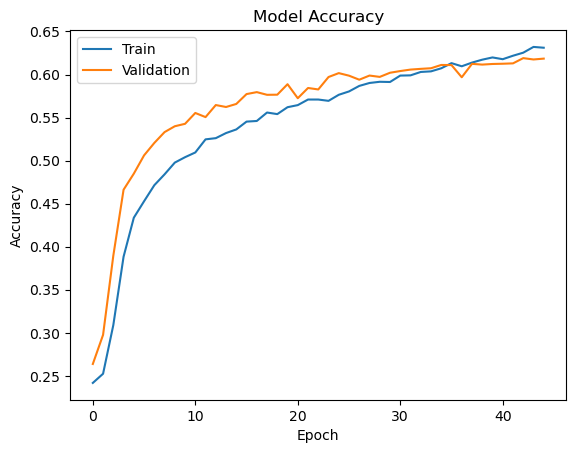

In [23]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
1.Utmaningar du haft under arbetet samt hur du hanterat dem.  
Svar: Om idén genom vilken vi kan använda detta koncept av emotiondetektering i praktiska arbetsscenarier.
2.Vilket betyg du anser att du skall ha och varför.  
Svar: Enligt mitt utförda arbete
3.Tips du hade ”gett till dig själv” i början av kursen nu när du slutfört den.  
Svar: Träna varje dag.